# Gathering Data

In [9]:
import pandas as pd

df = pd.read_csv('manufacturing.csv')

# Data Analysis

In [13]:
# Lets see first 10 rows of the dataset
df.head(10)

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000
5,229.178823,8.498306,1947.631786,53136.690654,1.203707e+07,99.998786
6,187.517442,19.412851,3640.248155,42478.694500,6.593260e+06,100.000000
7,278.354600,7.070944,1968.229758,77834.818230,2.156722e+07,95.732723
8,292.732552,20.432896,5981.373734,94223.147069,2.508452e+07,64.623599
9,176.688304,14.145782,2499.394266,34049.372335,5.515789e+06,100.000000


In [15]:
# Datatypes of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


In [19]:
# Basic math calculations
df.describe()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
count,3957.000000,3957.000000,3957.000000,3957.000000,3.957000e+03,3957.000000
mean,200.034704,14.815558,2955.321308,48127.183128,1.003645e+07,96.260179
std,58.135717,5.772040,1458.224940,23812.213513,7.599356e+06,12.992262
min,100.014490,5.003008,513.706875,10156.971955,9.999462e+05,1.000000
25%,150.871296,9.692984,1798.247303,27626.929091,3.433810e+06,99.941129
50%,198.603371,14.832557,2678.277782,44611.452164,7.833390e+06,99.999997
75%,251.366552,19.749680,3929.058261,67805.443846,1.588251e+07,100.000000
max,299.992804,24.999132,7365.018714,103756.181544,2.699783e+07,100.000000


Std indicates that there is quite small varience

# Data Visualization

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

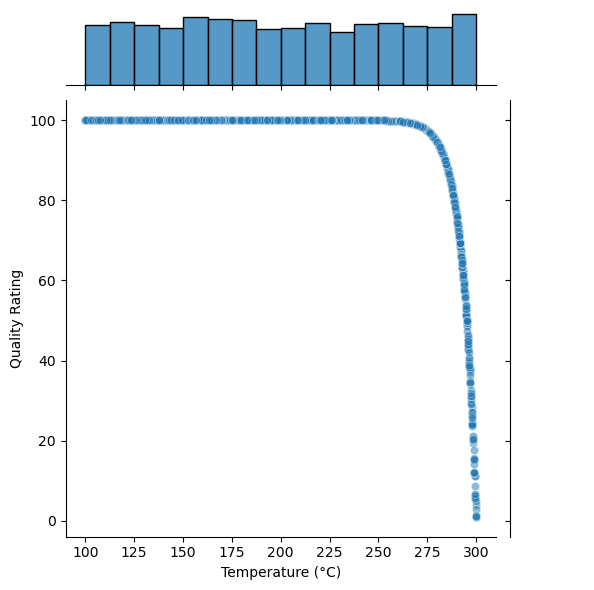

In [28]:
sns.jointplot(x="Temperature (°C)", y="Quality Rating", data=df, alpha=0.5)

There is a clear correlation here


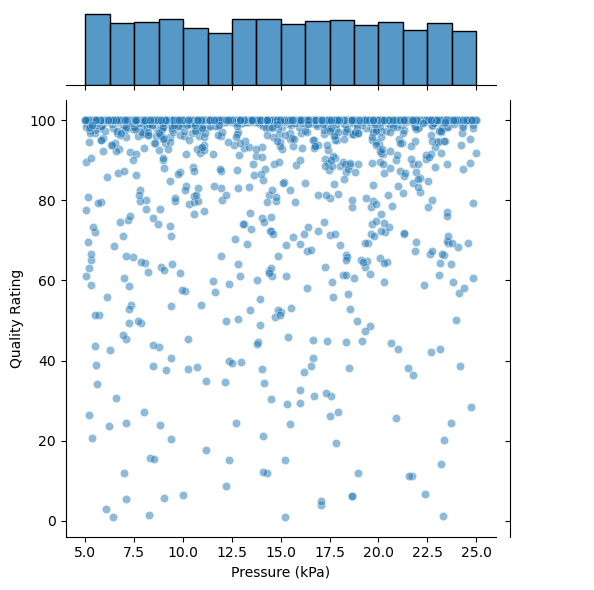

In [32]:
sns.jointplot(x="Pressure (kPa)", y="Quality Rating", data=df, alpha=0.5)

Not clear and noisy relationship

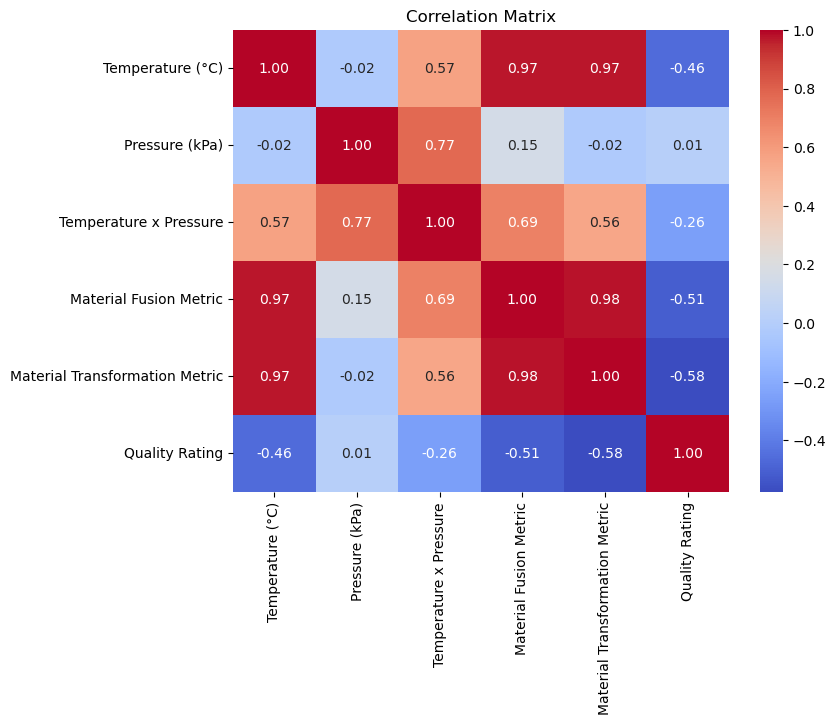

In [35]:
attributes = ['Temperature (°C)','Pressure (kPa)','Temperature x Pressure','Material Fusion Metric','Material Transformation Metric','Quality Rating']
# 'symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize'
# Compute the correlation matrix
correlation_matrix = df[attributes].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

# Add title
plt.title("Correlation Matrix")
plt.show()

Strong Negative correlation with 'Material Fusion Metric','Material Transformation Metric','Temperature x Pressure' and 'Temperature (°C)'

<Figure size 600x400 with 0 Axes>

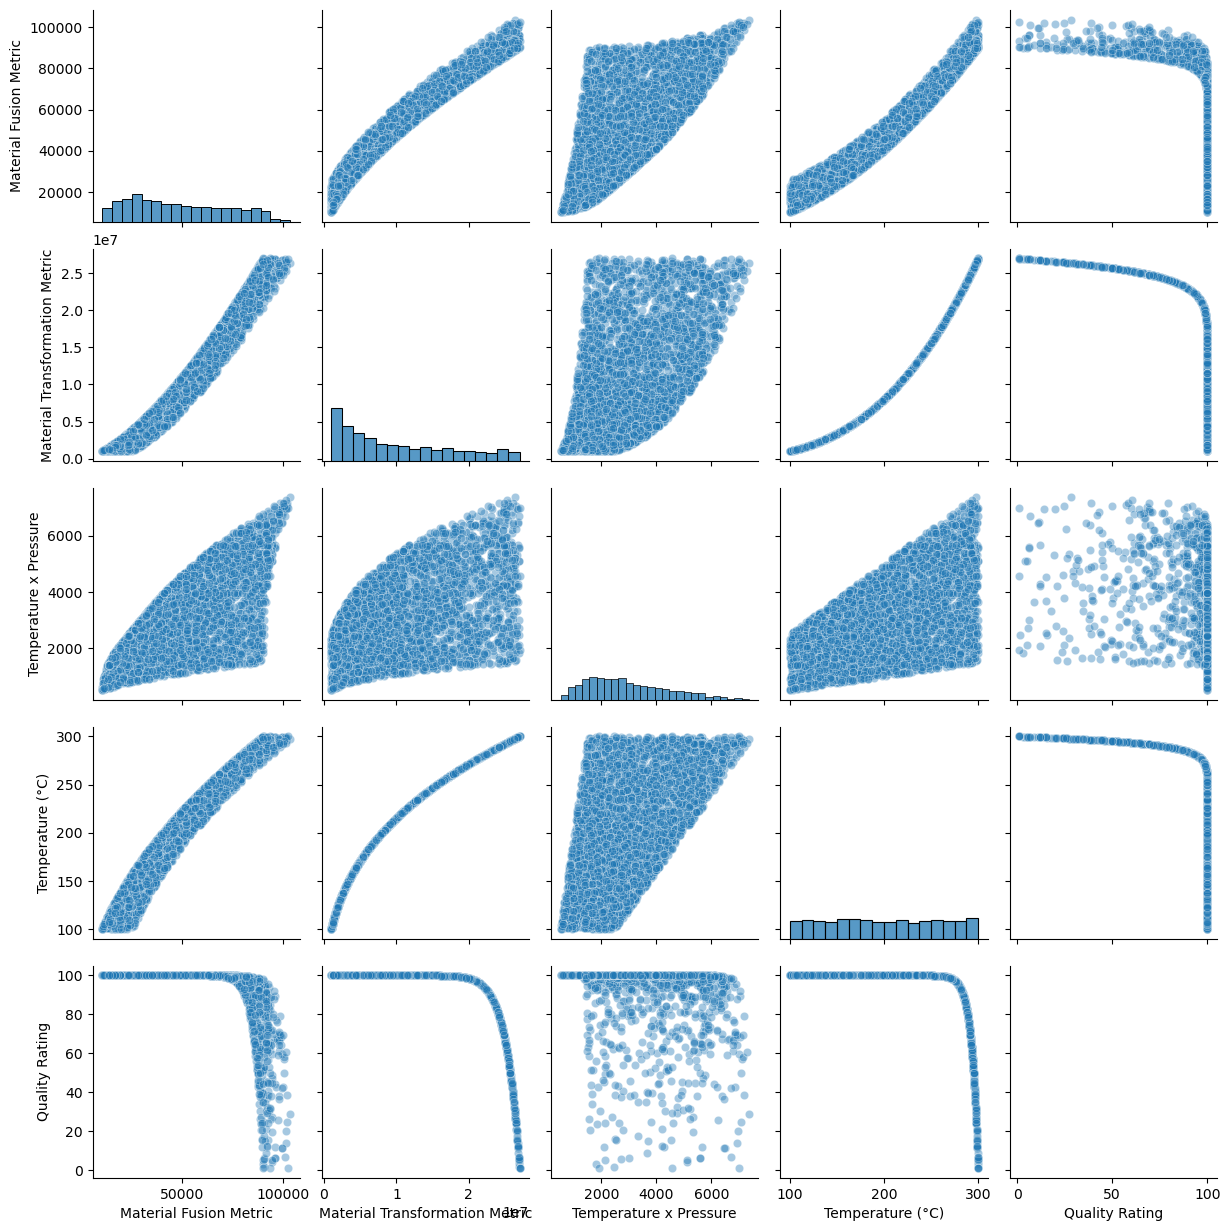

In [48]:
# Lets see how it looks

# Columns effecting the quality rating the most
attributes = ['Material Fusion Metric','Material Transformation Metric','Temperature x Pressure','Temperature (°C)', 'Quality Rating']
plt.figure(figsize=(6, 4))
sns.pairplot(df[attributes], kind='scatter', plot_kws={'alpha': 0.4})
plt.show()

# Modelling using Ridge regularization

### Preparing Data

In [57]:
from sklearn.model_selection import train_test_split

In [66]:
X = df.drop(['Quality Rating'], axis=1)
y = df['Quality Rating']

In [68]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=42)

### Pipeline creation

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
#Pipeline with PolynomialFeatures and Regularization (Ridge)
ridge_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),  # Create polynomial features
    ('scaler', StandardScaler()),           # Standardize the features
    ('ridge', Ridge(alpha=0.1))             # Ridge regression with L2 regularization
])

### Training Model

In [116]:
ridge_pipeline.fit(X_train, y_train)  # Train the model

Pipeline(steps=[('poly', PolynomialFeatures()), ('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.1))])

In [118]:
y_pred = ridge_pipeline.predict(X_test)  # Make predictions
y_pred

array([48.32835882, 95.00540562, 89.09198093, ..., 99.79615704,
       97.29011527, 97.9222887 ])

## Testing

In [87]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

In [97]:
# Evaluation
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test,y_pred)
print('R^2: ', r2)

Mean Squared Error:  36.42903858480729
Mean Absolute Error:  3.183386822974852
Root Mean Squared Error RMSE:  6.035647321108755
R^2:  0.8181550644153244


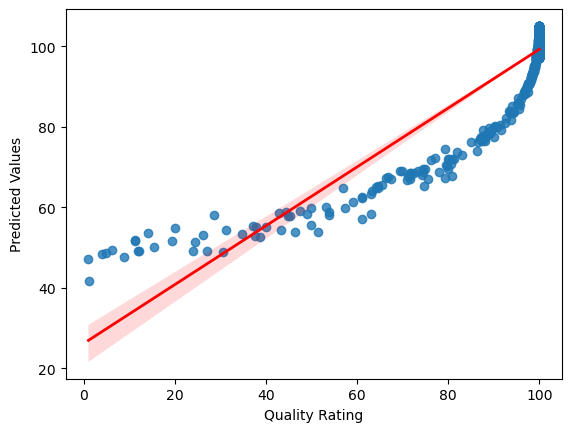

In [99]:
comparison=y_test.copy()
comparison=pd.DataFrame(comparison)
comparison['Predicted Values']=np.round(y_pred,2)

sns.regplot(x="Quality Rating", y="Predicted Values", data=comparison, line_kws={'color': 'red', 'linewidth': 2})

plt.show()

In [103]:
comparison

,Quality Rating,Predicted Values
149,4.052686,48.33
1025,98.873036,95.01
2153,96.914933,89.09
720,99.951543,103.89
325,99.999999,99.06
...,...,...
313,100.000000,101.07
601,100.000000,97.66
233,100.000000,99.80
3095,100.000000,97.29


# Modelling using Lasso regularization

### Pipeline creation

In [111]:
# Lasso Pipeline
lasso_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),  # Generate polynomial features
    ('scaler', StandardScaler()),           # Standardize features
    ('lasso', Lasso(alpha=0.1, max_iter=10000, random_state=42))  # Lasso regression
])

### Training the model

In [114]:
# Fit Lasso model on training data
lasso_pipeline.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()), ('scaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.1, max_iter=10000, random_state=42))])

### Testing the Model

In [123]:
# Predict and evaluate
y_pred_lasso = lasso_pipeline.predict(X_test)
y_pred_lasso

array([ 61.88215056,  88.55369803,  84.38003481, ...,  96.42570796,
       100.75755099,  99.92320032])

In [125]:
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_lasso))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred_lasso))
print("Root Mean Squared Error RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred_lasso)))
r2 = r2_score(y_test,y_pred_lasso)
print('R^2: ', r2)

Mean Squared Error:  68.6213249021468
Mean Absolute Error:  4.547123897939212
Root Mean Squared Error RMSE:  8.28379894143664
R^2:  0.6574589697854363


In [127]:
comparison=y_test.copy()
comparison=pd.DataFrame(comparison)
comparison['Predicted Values']=np.round(y_pred_lasso,2)
comparison

,Quality Rating,Predicted Values
149,4.052686,61.88
1025,98.873036,88.55
2153,96.914933,84.38
720,99.951543,97.90
325,99.999999,103.64
...,...,...
313,100.000000,97.45
601,100.000000,101.72
233,100.000000,96.43
3095,100.000000,100.76


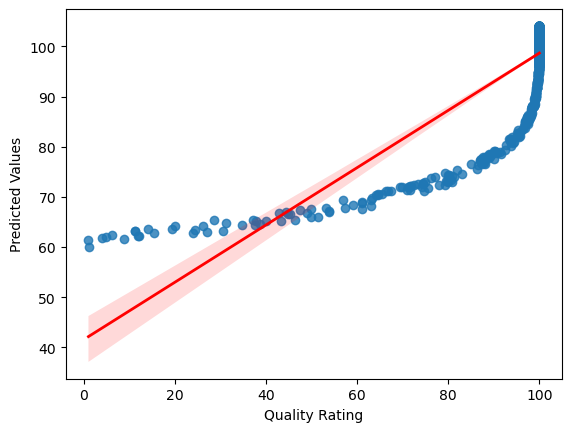

In [129]:
sns.regplot(x="Quality Rating", y="Predicted Values", data=comparison, line_kws={'color': 'red', 'linewidth': 2})

plt.show()

# Modelling using Elastic Net

### Pipeline creation

In [153]:
# Elastic Net Pipeline
elastic_net_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),  # Generate polynomial features
    ('scaler', StandardScaler()),           # Standardize features
    ('elastic_net', ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=1000, random_state=42))  # ElasticNet regression
])

### Training the model

In [156]:
# Fit Elastic Net model on training data
elastic_net_pipeline.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()), ('scaler', StandardScaler()),
                ('elastic_net', ElasticNet(alpha=0.1, random_state=42))])

### Testing the model

In [159]:
# Predict and evaluate
y_pred_elastic_net = elastic_net_pipeline.predict(X_test)
y_pred_elastic_net

array([ 68.15805189,  87.65795555,  84.53610959, ...,  97.1329564 ,
       101.70350616, 101.1010407 ])

In [161]:
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_elastic_net))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred_elastic_net))
print("Root Mean Squared Error RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred_elastic_net)))
r2 = r2_score(y_test,y_pred_elastic_net)
print('R^2: ', r2)

Mean Squared Error:  82.71949648580106
Mean Absolute Error:  4.5525619341341725
Root Mean Squared Error RMSE:  9.095025920018099
R^2:  0.5870843125590857


In [163]:
comparison=y_test.copy()
comparison=pd.DataFrame(comparison)
comparison['Predicted Values']=np.round(y_pred_elastic_net,2)
comparison

,Quality Rating,Predicted Values
149,4.052686,68.16
1025,98.873036,87.66
2153,96.914933,84.54
720,99.951543,95.66
325,99.999999,103.13
...,...,...
313,100.000000,98.57
601,100.000000,102.32
233,100.000000,97.13
3095,100.000000,101.70


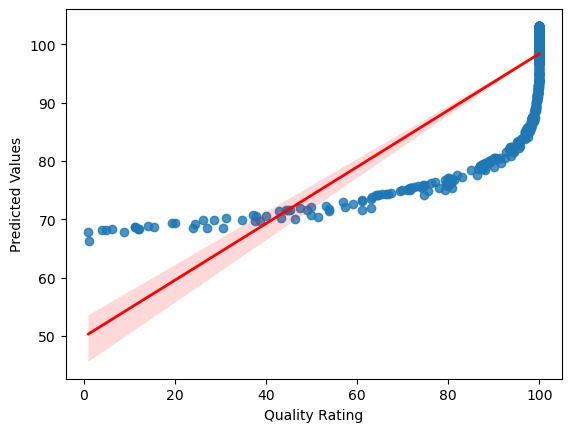

In [165]:
sns.regplot(x="Quality Rating", y="Predicted Values", data=comparison, line_kws={'color': 'red', 'linewidth': 2})

plt.show()

# Learning Curves

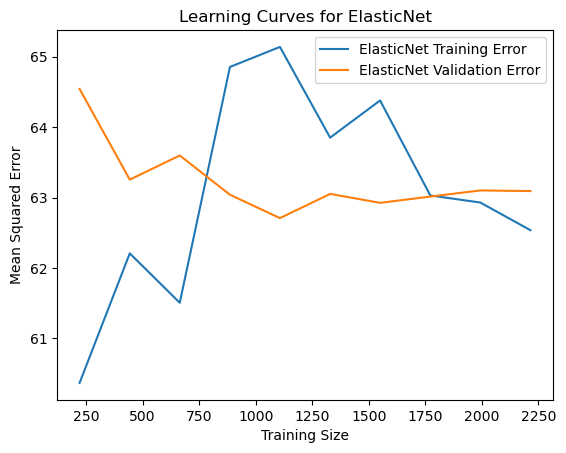

In [169]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Define the function to plot learning curve
def plot_learning_curve(model, X_train, y_train, model_name):
    train_sizes, train_scores, valid_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', 
        train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    )

    # Convert negative MSE to positive values for better interpretation
    train_errors = -train_scores.mean(axis=1)
    valid_errors = -valid_scores.mean(axis=1)
    
    # Plot the learning curve
    plt.plot(train_sizes, train_errors, label=f'{model_name} Training Error')
    plt.plot(train_sizes, valid_errors, label=f'{model_name} Validation Error')

# Plot learning curve for the ElasticNet pipeline
plot_learning_curve(elastic_net_pipeline, X_train, y_train, "ElasticNet")

# Add labels and show the plot
plt.title('Learning Curves for ElasticNet')
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

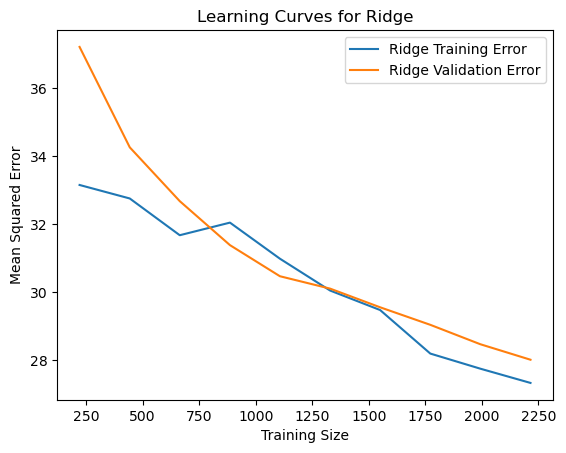

In [178]:
plot_learning_curve(ridge_pipeline, X_train, y_train, "Ridge")

# Add labels and show the plot
plt.title('Learning Curves for Ridge')
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

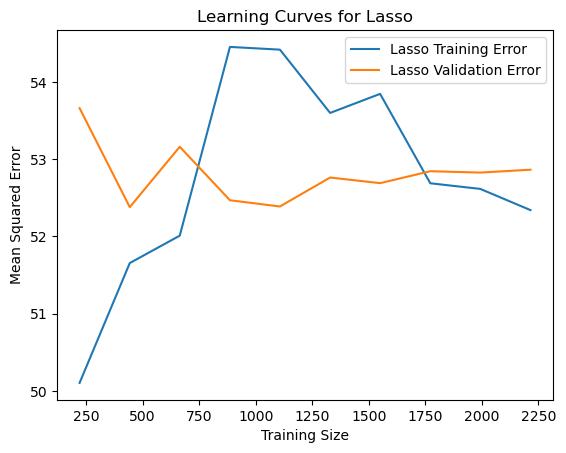

In [180]:
plot_learning_curve(lasso_pipeline, X_train, y_train, "Lasso")

# Add labels and show the plot
plt.title('Learning Curves for Lasso')
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Conclusion

**I assume that Ridge Regression regularization method is the most suitable one for this model and dataset**

**Comparison of 3 regularization  methods:**

**Ridge Model:**
<br>Mean Squared Error:  36.42903858480729
<br>Mean Absolute Error:  3.183386822974852
<br>Root Mean Squared Error RMSE:  6.035647321108755
<br>R^2:  0.8181550644153244


**Lasso Model:**
<br>Mean Squared Error:  68.6213249021468
<br>Mean Absolute Error:  4.547123897939212
<br>Root Mean Squared Error RMSE:  8.28379894143664
<br>R^2:  0.6574589697854363


**Net Elastic Model:**
<br>Mean Squared Error:  82.71949648580106
<br>Mean Absolute Error:  4.5525619341341725
<br>Root Mean Squared Error RMSE:  9.095025920018099
<br>R^2:  0.5870843125590857


**Ridge has the best performance. It provides the lowest error values and the highest R² score, which means the model fits the data well.**
<br>**Learning Curves also showed that Ridge Model makes best progress.**